<a href="https://colab.research.google.com/github/EmiliaPaula/MineracaoDados/blob/main/Minera%C3%A7%C3%A3oDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Importar bibliotecas
import pandas as pd
from google.colab import files

# 2. Fazer upload do arquivo
uploaded = files.upload()

# 3. Ler o dataset
df = pd.read_csv('mammographic_masses.data', header=None)

# 4. Adicionar cabeçalho
df.columns = ['BI-RADS', 'idade', 'forma', 'contorno', 'densidade', 'severidade']

df.head()

df.tail()  # Exibe as 5 últimas linhas por padrão.

df.info()  # Fornece um resumo do DataFrame, incluindo o número de entradas, tipos de dados e valores não nulos.

# Comentar o método que não irá visualizar (severidade 0 - bom 1- maligno)
df.describe()
df.head()
# Cardinalidade
cardinalidade = df.nunique()
print(cardinalidade)


Saving mammographic_masses.data to mammographic_masses (1).data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   BI-RADS     961 non-null    object
 1   idade       961 non-null    object
 2   forma       961 non-null    object
 3   contorno    961 non-null    object
 4   densidade   961 non-null    object
 5   severidade  961 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 45.2+ KB
BI-RADS        8
idade         74
forma          5
contorno       6
densidade      5
severidade     2
dtype: int64


In [ ]:
# Supondo que 'df' seja seu DataFrame
valores_ausentes = df[df.eq('?').any(axis=1)]

# Exibir as linhas com valores ausentes
print(valores_ausentes)

    BI-RADS idade forma contorno densidade  severidade
1         4    43     1        1         ?           1
4         5    74     1        5         ?           1
5         4    65     1        ?         3           0
6         4    70     ?        ?         3           0
7         5    42     1        ?         3           0
..      ...   ...   ...      ...       ...         ...
778       4    60     ?        4         3           0
819       4    35     3        ?         2           0
824       6    40     ?        3         4           1
884       5     ?     4        4         3           1
923       5     ?     4        3         3           1

[131 rows x 6 columns]


In [ ]:
valores_ausentes = df.isna().sum()
print(valores_ausentes)

BI-RADS       0
idade         0
forma         0
contorno      0
densidade     0
severidade    0
dtype: int64


In [ ]:
frequencia_birads = df['BI-RADS'].value_counts()   print(frequencia_birads)

SyntaxError: invalid syntax (<ipython-input-7-710bc213fd1b>, line 1)

In [ ]:
linhas_com_interrogacao = df.loc[df['BI-RADS'] == '?']
print(linhas_com_interrogacao)

    BI-RADS idade forma contorno densidade  severidade
20        ?    66     ?        ?         1           1
208       ?    52     4        4         3           0


In [ ]:
# Filtrar o DataFrame para severidade = 1
severidade_1 = df[df['severidade'] == 0]

# Calcular a frequência de BI-RADS para severidade = 1
frequencia_birads_severidade_1 = severidade_1['BI-RADS'].value_counts()

# Exibir os resultados
print(frequencia_birads_severidade_1)

df.loc[208, 'BI-RADS'] = 4


BI-RADS
4    427
5     40
3     30
2     13
6      3
0      2
?      1
Name: count, dtype: int64


In [ ]:
linhas_com_interrogacao_idade = df[df['idade'] == '?']
print(linhas_com_interrogacao_idade)

df_filtrado = df[df['severidade'] == 1]
print(df_filtrado)  # Exibe o DataFrame filtrado


    BI-RADS idade forma contorno densidade  severidade
443       4     ?     4        5         3           1
453       5     ?     4        4         3           1
683       5     ?     3        3         3           1
884       5     ?     4        4         3           1
923       5     ?     4        3         3           1
    BI-RADS idade forma contorno densidade  severidade
0         5    67     3        5         3           1
1         4    43     1        1         ?           1
2         5    58     4        5         3           1
4         5    74     1        5         ?           1
8         5    57     1        5         3           1
..      ...   ...   ...      ...       ...         ...
951       5    67     4        5         3           1
952       4    68     4        4         3           1
955       4    52     4        4         3           1
957       4    56     4        5         3           1
959       5    66     4        5         3           1

[445 rows

In [ ]:
linhas_com_interrogacao_idade = df[df['idade'] == '?']
print(linhas_com_interrogacao_idade)

    BI-RADS idade forma contorno densidade  severidade
443       4     ?     4        5         3           1
453       5     ?     4        4         3           1
683       5     ?     3        3         3           1
884       5     ?     4        4         3           1
923       5     ?     4        3         3           1


In [ ]:
# Criar um novo DataFrame sem as linhas com idade = '?'
df_sem_interrogacao_idade = df[df['idade'] != '?']

# Exibir o novo DataFrame
print(df_sem_interrogacao_idade)

    BI-RADS idade forma contorno densidade  severidade
0         5    67     3        5         3           1
1         4    43     1        1         ?           1
2         5    58     4        5         3           1
3         4    28     1        1         3           0
4         5    74     1        5         ?           1
..      ...   ...   ...      ...       ...         ...
956       4    47     2        1         3           0
957       4    56     4        5         3           1
958       4    64     4        5         3           0
959       5    66     4        5         3           1
960       4    62     3        3         3           0

[956 rows x 6 columns]


In [ ]:
idade_describe = df_sem_interrogacao_idade['idade'].describe()
print(idade_describe)

count     956
unique     73
top        59
freq       36
Name: idade, dtype: object


In [ ]:
severidade_1 = df_sem_interrogacao_idade[df_sem_interrogacao_idade['severidade'] == 1]
print(severidade_1)

    BI-RADS idade forma contorno densidade  severidade
0         5    67     3        5         3           1
1         4    43     1        1         ?           1
2         5    58     4        5         3           1
4         5    74     1        5         ?           1
8         5    57     1        5         3           1
..      ...   ...   ...      ...       ...         ...
951       5    67     4        5         3           1
952       4    68     4        4         3           1
955       4    52     4        4         3           1
957       4    56     4        5         3           1
959       5    66     4        5         3           1

[440 rows x 6 columns]


In [ ]:
severidade_1 = df_sem_interrogacao_idade[df_sem_interrogacao_idade['severidade'] == 1]
print(severidade_1)

    BI-RADS idade forma contorno densidade  severidade
0         5    67     3        5         3           1
1         4    43     1        1         ?           1
2         5    58     4        5         3           1
4         5    74     1        5         ?           1
8         5    57     1        5         3           1
..      ...   ...   ...      ...       ...         ...
951       5    67     4        5         3           1
952       4    68     4        4         3           1
955       4    52     4        4         3           1
957       4    56     4        5         3           1
959       5    66     4        5         3           1

[440 rows x 6 columns]


In [ ]:
# Calcular a idade média
idade_media = severidade_1['idade'].mean()

# Exibir a idade média
print(idade_media)

TypeError: Could not convert string '6743587457607642595466564259754554576748624464678053595260747268667074604468515862738059544433715551406775664659656780626363715771555867876854866349717437815979418566517243594376577954638076646372765857705673776771657672756167556657707940686465556644778050464950546777716471603472608554556775874646615978343983565588714952586780685474495052687458606974686170376576724266486067786643665833363983686378466056696654806869718755848077545140424447525383506382805944497175877055766265736567617173635045676671698070658340793864558456597559288559654663536666864759614693446164796843526758686268355567735850596053796764705565455749644066645243517959665058625771626771686676967045656469624859676159527771637276696867566965626743415558877260833162587565745765744060867185725271646286465856497662645370557665413650545248656566417242807267615552636257667750744262574074577148587054716768525666' to numeric

In [ ]:
# Convert 'idade' column to numeric, forcing non-numeric values to NaN
severidade_1['idade'] = pd.to_numeric(severidade_1['idade'], errors='coerce')

# Now calculate the mean, ignoring NaN values
idade_media = severidade_1['idade'].mean(skipna=True)

# Exibir a idade média
print(idade_media)

62.25909090909091


<ipython-input-15-d3eebd7ac5e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  severidade_1['idade'] = pd.to_numeric(severidade_1['idade'], errors='coerce')


In [ ]:
df['idade'] = df['idade'].replace('?', 62)


In [ ]:
linhas_com_interrogacao = df[df['idade'] == '?']
print(linhas_com_interrogacao)

Empty DataFrame
Columns: [BI-RADS, idade, forma, contorno, densidade, severidade]
Index: []


In [ ]:
linhas_ausentes = []
for i in df.index:
       if df.loc[i].isin(['?']).any():
           linhas_ausentes.append(i)

In [ ]:
print(df.loc[linhas_ausentes])

    BI-RADS idade forma contorno densidade  severidade
1         4    43     1        1         ?           1
4         5    74     1        5         ?           1
5         4    65     1        ?         3           0
6         4    70     ?        ?         3           0
7         5    42     1        ?         3           0
..      ...   ...   ...      ...       ...         ...
745       6    76     3        ?         3           0
752       5    48     ?        4         ?           1
778       4    60     ?        4         3           0
819       4    35     3        ?         2           0
824       6    40     ?        3         4           1

[125 rows x 6 columns]


In [ ]:
valores_ausentes = df[df.eq('?').any(axis=1)]# Exibir as linhas com valores ausentes

In [ ]:
print(valores_ausentes)

    BI-RADS idade forma contorno densidade  severidade
1         4    43     1        1         ?           1
4         5    74     1        5         ?           1
5         4    65     1        ?         3           0
6         4    70     ?        ?         3           0
7         5    42     1        ?         3           0
..      ...   ...   ...      ...       ...         ...
745       6    76     3        ?         3           0
752       5    48     ?        4         ?           1
778       4    60     ?        4         3           0
819       4    35     3        ?         2           0
824       6    40     ?        3         4           1

[125 rows x 6 columns]


In [ ]:
linhas_ausentes_forma = df[df['forma'] == '?']
print(linhas_ausentes_forma)

    BI-RADS idade forma contorno densidade  severidade
6         4    70     ?        ?         3           0
9         5    60     ?        5         1           1
20        ?    66     ?        ?         1           1
48        2    42     ?        ?         4           0
54        4    53     ?        5         3           1
74        5    70     ?        4         ?           1
83        4    57     ?        4         1           0
128       4    52     ?        4         ?           0
157       4    51     ?        ?         3           0
163       4    53     ?        4         3           0
236       3    60     ?        3         1           0
255       3    76     ?        3         2           0
387       5    64     ?        ?         3           0
388       2    49     ?        3         3           0
389       3    44     ?        4         3           0
394       4    34     ?        ?         4           0
476       4    41     ?        ?         3           0
496       

In [ ]:
df2 = df[df['forma'] != '?']

In [ ]:
# dataframe com exclusão de ausentes na coluna forma
print(df2)

    BI-RADS idade forma contorno densidade  severidade
0         5    67     3        5         3           1
1         4    43     1        1         ?           1
2         5    58     4        5         3           1
3         4    28     1        1         3           0
4         5    74     1        5         ?           1
..      ...   ...   ...      ...       ...         ...
956       4    47     2        1         3           0
957       4    56     4        5         3           1
958       4    64     4        5         3           0
959       5    66     4        5         3           1
960       4    62     3        3         3           0

[930 rows x 6 columns]


In [ ]:
severidade_1 = df[df['severidade'] == 1]
frequencia_forma_severidade_1 = severidade_1['forma'].value_counts()
print(frequencia_forma_severidade_1)

forma
4    315
3     45
1     38
2     35
?     12
Name: count, dtype: int64


In [ ]:
# Filtrar as linhas com 'forma' igual a '?' e 'severidade' igual a 1
linhas_selecionadas = df[(df['forma'] == '?') & (df['severidade'] == 1)]

# Atribuir o valor 4 para a coluna 'forma' nas linhas selecionadas
df.loc[linhas_selecionadas.index, 'forma'] = 4

In [ ]:
severidade_0 = df[df['severidade'] == 0]
frequencia_forma_severidade_0 = severidade_0['forma'].value_counts()
print(frequencia_forma_severidade_0)

forma
1    186
2    176
4     85
3     50
?     19
Name: count, dtype: int64


In [ ]:
# Filtrar as linhas com 'forma' igual a '?' e 'severidade' igual a 0
linhas_selecionadas = df[(df['forma'] == '?') & (df['severidade'] == 0)]

# Atribuir o valor 4 para a coluna 'forma' nas linhas selecionadas
df.loc[linhas_selecionadas.index, 'forma'] = 1

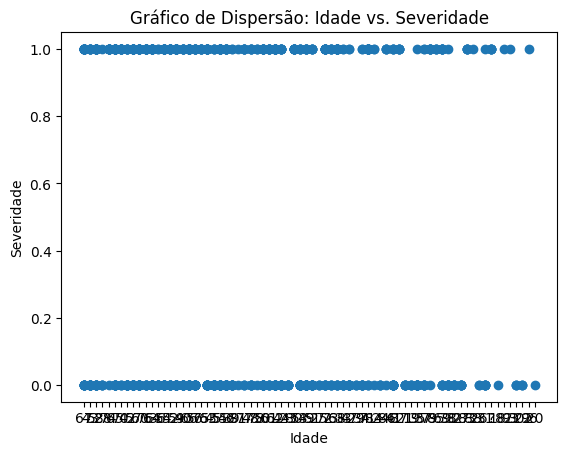

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['idade'], df['severidade'])
plt.xlabel('Idade')
plt.ylabel('Severidade')
plt.title('Gráfico de Dispersão: Idade vs. Severidade')
plt.show()

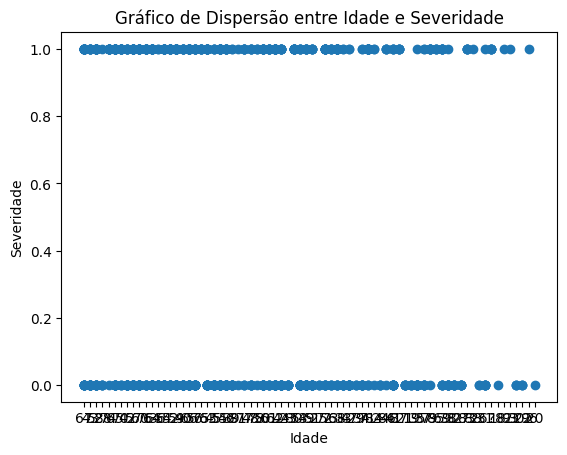

ValueError: could not convert string to float: '?'

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de Dispersão
plt.scatter(df['idade'], df['severidade'])
plt.xlabel('Idade')
plt.ylabel('Severidade')
plt.title('Gráfico de Dispersão entre Idade e Severidade')
plt.show()

# Matriz de Correlação
correlation_matrix = df.corr()
print(correlation_matrix['idade'])

# Gráfico de Caixa
sns.boxplot(x='severidade', y='idade', data=df)
plt.xlabel('Severidade')
plt.ylabel('Idade')
plt.title('Gráfico de Caixa da Idade por Severidade')
plt.show()